# Gaussian Processes and Gaussian Process Regression

This notebook will walk through the key mathematical details required to understand what a Gaussian Process is and how Gaussian Process Regression works.


In [58]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import binom, beta

sns.set(rc = {'figure.figsize':(8,4)})

Just as a multivariate normal distribution is completely specified by a mean vector and covariance matrix, a Gaussian Process is fully specified by a mean function and a covariance function

$$p(x) \sim \mathcal{GP}(m(x), k(x,x'))$$

For example, take the mean function equal to 0 and the squared exponential covariance function

$$m(x) = 0$$
$$k(x,x') = \theta_1 \cdot exp \left(- \frac{\theta_2}{2}(x - x')^2 \right)$$

It turns out that most of the learning in the GP involves the covariance function and its hyperparameters, so very little is gained in specifying a complicated mean function. It is common to take a mean function of 0 as the prior and rely completely on the covariance function for learning.

In [2]:
def exponential_cov(x, y, params):
    return params[0] * np.exp(-0.5 * params[1] * np.subtract.outer(x,y)**2)

In [24]:
theta = [1, 10]
sigma_0 = exponential_cov(0, 0, theta)

(-3.0, 3.0)

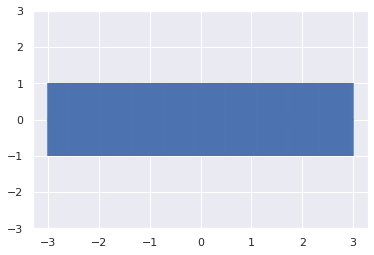

In [34]:
xpts = np.arange(-3, 3, step=0.01)
plt.errorbar(xpts, np.zeros(len(xpts)), yerr=sigma_0, capsize=0);
plt.ylim(-3, 3)

In [28]:
x = [1.]
y = [np.random.normal(scale=sigma_0)]

In [35]:
sigma_1 = exponential_cov(x, x, theta)

In [36]:
sigma_1

array([[1.]])

In [37]:
def predict(x, data, kernel, params, sigma, t):
    # We need to know the variance of the multivariate gaussian 'x', and the 'x_known's in 'data'
    # This results in a list of variances that correspond to the 'x_known's in data. This list is
    # the vector from a larger unknown covariance matrix that specifically represents the variance
    # between the new 'x' and the 'x_known's
    k = [kernel(x, x_known, params) for x_known in data]

    # Compute inverse of known sigma for computations later
    sigma_inv = np.linalg.inv(sigma)

    # Our new prediction for 'x' is a gaussian distribution which is specified by a mean and
    # variance. The mean and variance below are given by the conditoing propery of multivariate
    # Gaussian distributions, p(x_new | known_data) ~ N(y_mean, y_variance), shown below
    y_mean = np.dot(k, sigma_inv).dot(t)
    y_variance = kernel(x, x, params) - np.dot(k, sigma_inv).dot(k)

    return y_mean, y_variance

In [40]:
x_pred = 0.9

k = [exponential_cov(x_pred, y, theta) for y in x]


In [41]:
k

[0.951229424500714]

In [42]:
sigma_inv = np.linalg.inv(sigma_1)

In [43]:
sigma_inv

array([[1.]])

In [46]:
y_pred = np.dot(k, sigma_inv).dot(y)

In [47]:
y_pred

1.583008386221042

In [48]:
y

[1.6641709617550353]

In [54]:
0.95 * y[0]

1.5809624136672835

In [55]:
k

[0.951229424500714]

In [56]:
np.dot(k, sigma_inv)

array([0.95122942])

In [57]:
k

[0.951229424500714]